In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx


person_data = pd.read_csv('/content/sample_data/person_knows_person.csv', sep = "|")
person_data.head()

,Person.id,Person.id.1
0,38,956
1,38,962
2,38,941
3,38,74
4,38,36


In [ ]:
smaller_data = person_data.head(500)

smaller_data.head()


,Person.id,Person.id.1
0,38,956
1,38,962
2,38,941
3,38,74
4,38,36


Shortest Path using Dijkstra and A* algorithm


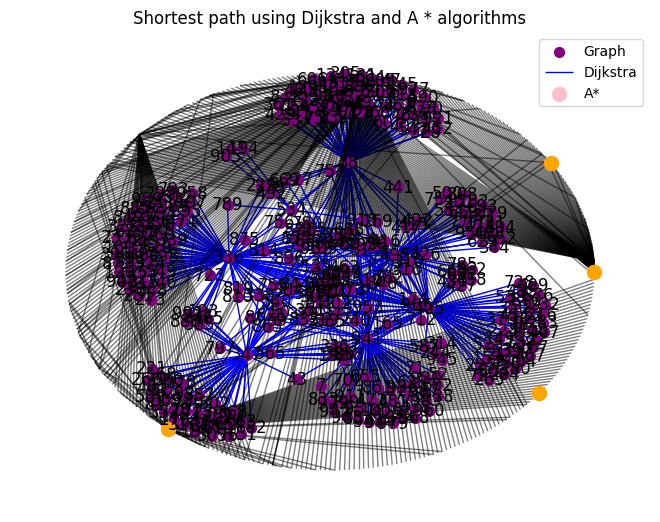

In [ ]:
G = nx.from_pandas_edgelist(smaller_data, 'Person.id', 'Person.id.1', create_using = nx.Graph())
pos = nx.circular_layout(G)



start_node = 38
end_node = 404
shortest_path_dijkstra = nx.dijkstra_path(G, source=start_node, target=end_node)
shortest_path_astar = nx.astar_path(G, source=start_node, target=end_node)

# Visualize the graph and the shortest paths
pos = nx.circular_layout(G)
nx.draw(G, node_size=50, node_color='purple', edge_color='blue', with_labels=True)
nx.draw_networkx_nodes(G, pos, nodelist=shortest_path_dijkstra, node_size=100, node_color='pink')
nx.draw_networkx_nodes(G, pos, nodelist=shortest_path_astar, node_size=100, node_color='orange')
nx.draw_networkx_edges(G, pos, width=1, alpha=0.5)
nx.draw_networkx_edges(G, pos, width=1, alpha=0.5, edge_color='blue', edgelist=[(u, v) for u, v in G.edges() if (u, v) in shortest_path_dijkstra], label='Dijkstra')
nx.draw_networkx_edges(G, pos, width=1, alpha=0.5, edge_color='red', edgelist=[(u, v) for u, v in G.edges() if (u, v) in shortest_path_astar], label='A*')


plt.title('Shortest path using Dijkstra and A * algorithms')
plt.legend(['Graph', 'Dijkstra','A*'])
plt.show()

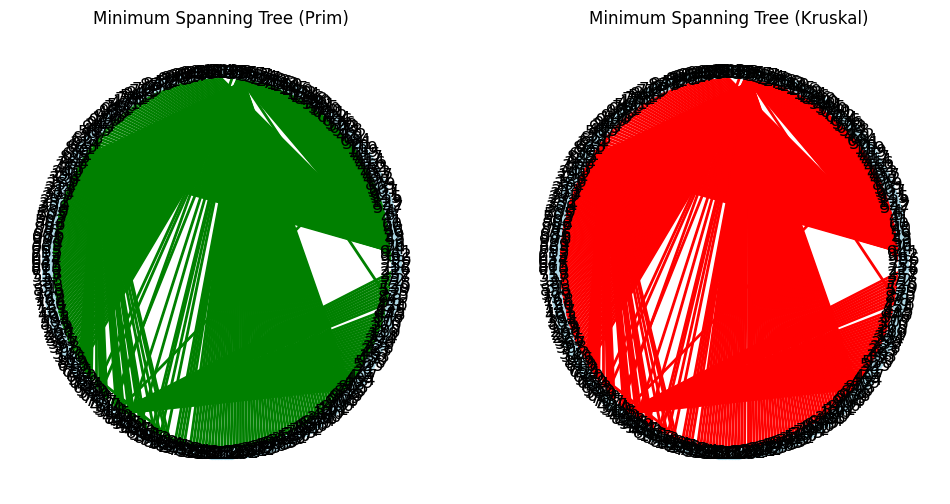

In [ ]:
# Find the MST using Kruskal's algorithm

mst_prim = nx.minimum_spanning_tree(G)
mst_kruskal = nx.minimum_spanning_tree(G, algorithm='kruskal')

# Visualize the MSTs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
nx.draw(G, pos, node_size=50, node_color='lightblue', edge_color='gray', with_labels=True)
nx.draw_networkx_edges(G, pos, edgelist=mst_prim.edges(), width=2.0, edge_color='green')
plt.title("Minimum Spanning Tree (Prim)")
plt.subplot(1, 2, 2)
nx.draw(G, pos, node_size=50, node_color='lightblue', edge_color='gray', with_labels=True)
nx.draw_networkx_edges(G, pos, edgelist=mst_kruskal.edges(), width=2.0, edge_color='red')
plt.title("Minimum Spanning Tree (Kruskal)")
plt.show()


In [ ]:
unremoved_edges_prim = G.remove_edges_from(list(set(G.edges()) - set(mst_prim.edges())))
unremoved_edges_kruskal =G.remove_edges_from(list(set(G.edges()) - set(mst_kruskal.edges())))

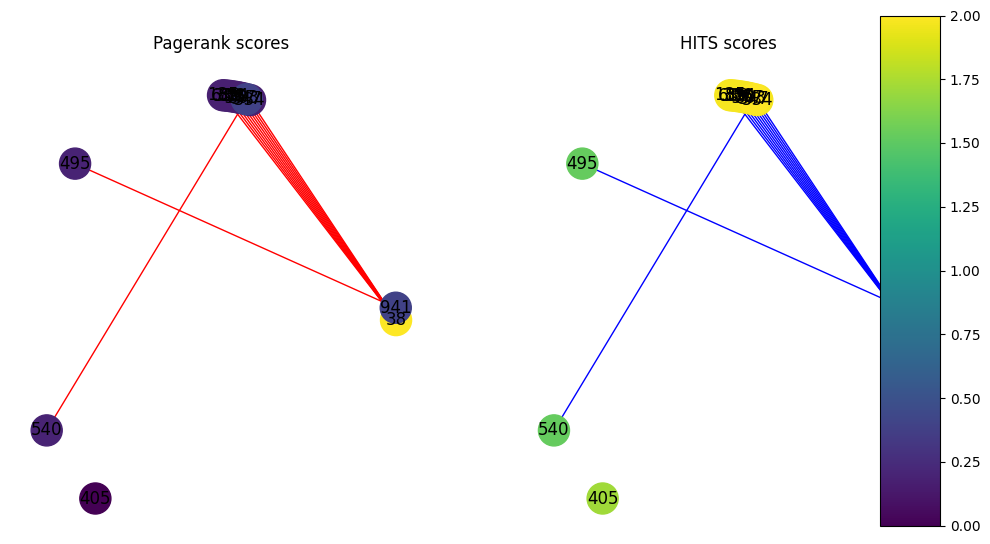

In [ ]:
# calculate the Pagerank and HITS scores
import matplotlib as mpl


subgraph_nodes = smaller_data['Person.id'].tolist()

subgraph = G.subgraph(subgraph_nodes)
pagerank_scores = nx.pagerank(subgraph)
hits_scores = nx.hits(subgraph)


# sort the nodes on basis of hits scores and pangerank scores

sorted_pangerank_nodes = sorted(pagerank_scores, key = pagerank_scores.get, reverse = True)
sorted_hits_nodes = sorted(hits_scores[0], key = hits_scores[0].get, reverse = True)


pagerank_colors = [pagerank_scores[node] for node in subgraph.nodes()]
hits_colors = [hits_scores[0][node] for node in subgraph.nodes()]

#plotting
fig = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
nx.draw(subgraph, pos, node_size= 500, node_color = pagerank_colors, cmap = 'viridis', edge_color = 'red', with_labels= True)
plt.title('Pagerank scores')

#ax2  = fig.add_axes([0.85,0.10,0.05,0.85])
#norm = mpl.colors.Normalize(vmin=0,vmax=2)
#cb1  = mpl.colorbar.ColorbarBase(ax2,cmap= 'viridis' ,norm=norm,orientation='vertical')
#plt.colorbar()

plt.subplot(1,2,2)
nx.draw(subgraph, pos, node_size= 500, node_color = hits_colors, cmap = 'viridis', edge_color = 'blue', with_labels= True)
plt.title('HITS scores')

ax2  = fig.add_axes([0.85,0.10,0.05,0.85])
norm = mpl.colors.Normalize(vmin=0,vmax=2)
cb1  = mpl.colorbar.ColorbarBase(ax2,cmap='viridis',norm=norm,orientation='vertical')
plt.show()
